# Análisis preliminar de las tarifas de prepago Surf y Ultimate

La empresa de telecomunicaciones Megaline, ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.

Nos entregaron los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Nuestro trabajo será analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Describiremos entonces, el comportamiento de los clientes. Buscaremos los minutos, SMS y volumen de datos que requieren los datos que requieren los usuarios de cada tarifa por mes. Calcularemos, la varianza y la desviación estándar. Trazaremos histogramas para visualizar mejor estos datos y describiremos las distribuciones.

Además, buscaremos probar las siguientes hipótesis:
1. El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
2. El ingreso promedio de los usuarios en el área de estados Nueva York - Nueva Jersey es diferente al de los usuarios de otras regiones del país.

# Contenido <a id='back'></a>

* [1 Inicialización](#inicio)
    * [1.1 Cargar datos](#carga_datos)
    * [1.2 Explorar datos iniciales](#explorar_datos)
        * [1.2.1 La tabla megaline_calls](#tabla_megaline_calls)
        * [1.2.2 La tabla megaline_internet](#tabla_megaline_internet) 
        * [1.2.3 La tabla megaline_messages](#tabla_megaline_messages) 
        * [1.2.4 La tabla megaline_plans](#tabla_megaline_plans)
        * [1.2.5 La tabla megaline_users](#tabla_megaline_users)
        * [1.2.6 Recapitulación de las tablas importadas](#recapitulacion_intro)
    * [1.3 Convertir los datos en los tipos necesarios](#convertir_datos)
    * [1.4 Revisar duplicados](#revisar_duplicados)
    * [1.5 Revisión de valores en cero o ausentes](#valores_cero)
    * [1.6 Preparación de las tablas](#preparación_tablas)
        * [1.6.1 megaline_calls mejorada](#preparación_calls)
        * [1.6.2 megaline_internet mejorada](#preparación_internet)
        * [1.6.3 megaline_messages mejorada](#preparación_messages)
        * [1.6.4 megaline_monthly_revenue](#preparación_revenue)
* [2 Analisis de las tablas](#analisis_tablas)
    * [2.1 Analisis de minutos por plan](#analisis_minutos)
    * [2.2 Analisis de gigas utilizados](#analisis_sesiones)
    * [2.3 Analisis de mensajes por plan](#analisis_mensajes)
    * [2.4 Comportamiento de los usuarios por plan](#comportamiento_usuario)
* [3 Comprobación de hipótesis](#comprobación_hipotesis)
     * [3.1 Hipótesis I](#comprobación_hipotesis_1)
     * [3.2 Hipótesis II](#comprobación_hipotesis_2)
* [4 Conclusión general](#conclusion)

    


## Inicialización <a id='inicio'></a>

Con el fin de resolver nuestras dudas cargaremos las siguientes librerías:
- Pandas
- Matplotlib
- numpy
- scipy.stats

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

### Cargas de datos: <a id='carga_datos'></a>

Recibimos cinco archivos que cargaremos a continuación, para luego poder comenzar a revisarlos y preparar los datos. El primer archivo contiene las llamadas, el segundo los datos de internet, luego tenemos uno con los datos de los mensajes, un cuarto archivo con los planes y el último con los usuarios. Revisaremos cada uno de ellos y crearemos una base única con todos los datos. Los cargaremos en líneas separadas por si necesitamos correr una celda individual a lo largo del estudio.

In [ ]:
megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')

In [ ]:
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [ ]:
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')

In [ ]:
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')

In [ ]:
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

### Explorar datos iniciales <a id='explorar_datos'></a>

#### La tabla megaline_calls <a id='tabla_megaline_calls'></a>

La tabla **megaline_calls** contiene los siguientes datos:
- id — identificador único de la llamada
- call_date — fecha de la llamada
- duration — duración de la llamada (en minutos)
- user_id — el identificador del usuario que realiza la llamada

In [ ]:
print('Presentación de las columnas de megaline_calls:')
print(megaline_calls.columns)
print()
print('Revisión del número de líneas de megaline_calls:')
print(len(megaline_calls), 'líneas.')

Presentación de las columnas de megaline_calls:
Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

Revisión del número de líneas de megaline_calls:
137735 líneas.


In [ ]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
megaline_calls.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


La tabla **megaline_calls** tiene 4 columnas, los nombres de cada una tienen un formato correcto. Esta tabla consta de 137 mil 735 líneas y no tiene valores ausentes. Si analisamos rápidamente cada columna encontramos lo siguiente:
 - id : Esta columna es del tipo object, y no parece tener problemas, quizás valdría la pena analizar si hay duplicados en ella ya que en esta el identificador debería ser único.
 - user_id : Es una columna del tipo int64, pero creo que debería ser object ya que es más bien el nombre del usuario no un valor a calcular.
 - call_date : Esta columna es del tipo object pero la pasaremos a DateTime para poder utilizarla como fecha en nuestra investigación.
 - duration : Es una columna del tipo float64, está columna se ve correcta.

#### La tabla megaline_internet <a id='tabla_megaline_internet'></a>

La tabla **megaline_internet** contiene los siguientes datos:
- id — identificador único de la sesión
- mb_used — el volumen de datos gastados durante la sesión (en megabytes)
- session_date — fecha de la sesión web
- user_id — identificador del usuario

In [ ]:
print('Presentación de las columnas de megaline_internet:')
print(megaline_internet.columns)
print()
print('Revisión del número de líneas de megaline_calls:')
print(len(megaline_internet), 'líneas.')

Presentación de las columnas de megaline_internet:
Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

Revisión del número de líneas de megaline_calls:
104825 líneas.


In [ ]:
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
megaline_internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


La tabla **megaline_internet** tiene 4 columnas también, los nombres de cada una tienen un formato correcto. Esta tabla consta de 104 mil 825 líneas y no tiene valores ausentes. Si analisamos rápidamente cada columna encontramos lo siguiente:

- id : Esta columna es del tipo object, y no parece tener problemas, quizás valdría la pena analizar si hay duplicados en ella ya que en esta el identificador debería ser único.
- user_id : Es una columna del tipo int64, pero creo que debería ser object ya que es más bien el nombre del usuario no un valor a calcular.
- session_date : Esta columna es del tipo object pero la pasaremos a DateTime para poder utilizarla como fecha en nuestra investigación.
- mb_used : Es una columna del tipo float64, está columna se ve correcta, sin embargo podemos notar tanto en la línea 1 como en la 104823 que el valor es 0.00 megabytes. Tendremos que analizar esos valores.

#### La tabla megaline_messages <a id='tabla_megaline_messages'></a>

La tabla **megaline_messages** contiene los siguientes datos:
- id — identificador único del SMS
- message_date — fecha del SMS
- user_id — el identificador del usuario que manda el SMS

In [ ]:
print('Presentación de las columnas de megaline_internet:')
print(megaline_messages.columns)
print()
print('Revisión del número de líneas de megaline_calls:')
print(len(megaline_messages), 'líneas.')

Presentación de las columnas de megaline_internet:
Index(['id', 'user_id', 'message_date'], dtype='object')

Revisión del número de líneas de megaline_calls:
76051 líneas.


In [ ]:
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
megaline_messages.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


La tabla **megaline_messages** tiene 3 columnas, los nombres de cada una tienen un formato correcto. Esta tabla consta de 76 mil 051 líneas y no tiene valores ausentes. Si analisamos rápidamente cada columna encontramos lo siguiente:

- id : Esta columna es del tipo object, y no parece tener problemas, quizás valdría la pena analizar si hay duplicados en ella ya que en esta el identificador debería ser único.
- user_id : Es una columna del tipo int64, pero creo que debería ser object ya que es más bien el nombre del usuario no un valor a calcular.
- message_date : Esta columna es del tipo object pero la pasaremos a DateTime para poder utilizarla como fecha en nuestra investigación.

#### La tabla megaline_plans <a id='tabla_megaline_plans'></a>

La tabla **megaline_plans** contiene los siguientes datos:
- plan_name — nombre de la tarifa
- usd_monthly_fee — pago mensual en dólares estadounidenses
- minutes_included — minutos incluidos al mes
- messages_included — SMS incluidos al mes
- mb_per_month_included — datos incluidos al mes (en megabytes)
- usd_per_minute — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
- usd_per_message — precio por SMS tras exceder los límites del paquete
- usd_per_gb — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

In [ ]:
print('Presentación de las columnas de megaline_internet:')
print(megaline_plans.columns)
print()
print('Revisión del número de líneas de megaline_calls:')
print(len(megaline_plans), 'líneas.')

Presentación de las columnas de megaline_internet:
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

Revisión del número de líneas de megaline_calls:
2 líneas.


In [ ]:
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla **megaline_plans** tiene 8 columnas, los nombres de cada una tienen un formato correcto. Esta tabla consta de 2 líneas y no tiene valores ausentes. Los datos recibidos se ven en el tipo correcto para cada columna. 

#### La tabla megaline_users <a id='tabla_megaline_users'></a>

La tabla **megaline_users** contiene los siguientes datos:
- user_id — identificador único del usuario
- first_name — nombre del usuario
- last_name — apellido del usuario
- age — edad del usuario (en años)
- reg_date — fecha de suscripción (dd, mm, aa)
- churn_date — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
- city — ciudad de residencia del usuario
- plan — nombre de la tarifa

In [ ]:
print('Presentación de las columnas de megaline_internet:')
print(megaline_users.columns)
print()
print('Revisión del número de líneas de megaline_calls:')
print(len(megaline_users), 'líneas.')

Presentación de las columnas de megaline_internet:
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

Revisión del número de líneas de megaline_calls:
500 líneas.


In [ ]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
megaline_users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


La tabla **megaline_users** tiene 8 columnas, los nombres de cada una tienen un formato correcto. Esta tabla consta de 500 y solo tiene valores ausentes en la columna *churn_date*. Si analisamos rápidamente cada columna encontramos lo siguiente:

- user_id : Es una columna del tipo int64, pero creo que debería ser object ya que es más bien el nombre del usuario no un valor a calcular.
- first_name y last_name : Son las columnas correspondientes a los nombres y ambas son tipo object. 
- age : Esta columna es del tipo int64.
- city : Esta columna corresponde a la ciudad e incluye el código postal, es del tipo object.
- reg_date : Esta columna es del tipo object pero la transformaremos al tipo DateTime ya que es una fecha.
- plan : Esta columna es del tipo object y está bien.
- churn_date : contiene solo 34 datos que corresponde a usuario que fueron dados de baja, los valores ausentes entonces corresponde a usuarios aún vigentes. 

#### Recapitulación de las tablas importadas <a id='recapitulacion_intro'></a>

Al revisar nuestros 5 datasets podemos notar que *megaline_calls*, *megaline_internet*, *megaline_messages* y *megaline_users* tienen en común la columna *user_id* (que pasaremos en todas las bases del tipo int64 a object), además estas cinco bases tienen fechas que pasaremos del tipo object a DateTime. Notamos también que *megaline_users* tiene la columna *plan* que coincide con *plan_name* en *megaline_plans*. Entonces, para que las tablas sean congruentes, nos conviene cambiar el nombre de la columna 'plan_name' a solo 'plan'.

Solo, por precausión, vamos a revisar si hay duplicados en las columnas *id* de *megaline_calls*, *megaline_internet* y *megaline_messages*, también revisaremos duplicados en la columna *user_id* de *megaline_users*.

Algunos puntos a tener en consideración con ciertas columnas, en base a los reglamentos tarifarios de Megaline:
"Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes."
- megaline_calls / duration: La tabla nos presenta los datos en minutos (8.52), por lo tanto podría ser mejor redondear los resultados hacia arriba (9 en el ejemplo).
- megaline_internet / mb_used: la tabla nos presenta los megabytes usados en la sessión. Entonces, tendremos que agrupar las sesiones del mes y el resultado redondearlo hacia arriba.

Finalmente, tendremos que revisar las columnas de *duration* y *mb_used* (arriba mencionada) para analizar los valores en 0, lo mismo con la columna *churn_data* (de *megaline_users*) para ver la repercusión de los valores ausentes (si es que la hay).

### Convertir los datos en los tipos necesarios <a id='convertir_datos'></a>

Lo primero será pasar nuestras cuatro columnas de 'user_id' del tipo int64 a object: 

In [ ]:
megaline_calls['user_id'] = megaline_calls['user_id'].astype('object')
megaline_internet['user_id'] = megaline_internet['user_id'].astype('object')
megaline_messages['user_id'] = megaline_messages['user_id'].astype('object')
megaline_users['user_id'] = megaline_users['user_id'].astype('object')

Ahora pasaremos las fechas a formato DateTIme:

In [ ]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')

Comprobaremos los cambios realizados:

In [ ]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [ ]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


Se regularizaron las columnas de 'user_id' y las columnas de fechas de los datasets *megaline_calls*, *megaline_internet*, *megaline_messages* y *megaline_users*. Ahora estas son del tipo object y datetime64 respectivamente.

### Revisar duplicados <a id='revisar_duplicados'></a>

Revisaremos si hay duplicados en las columnas *id* de *megaline_calls*, *megaline_internet* y *megaline_messages*, también revisaremos duplicados en la columna *user_id* de *megaline_users*.

In [ ]:
megaline_calls['id'].duplicated().sum()

0

In [ ]:
megaline_internet['id'].duplicated().sum()

0

In [ ]:
megaline_messages['id'].duplicated().sum()

0

In [ ]:
megaline_users['user_id'].duplicated().sum()

0

En ninguna de las columnas relevantes encontramos códigos duplicados, efectivamente tenemos solo identificadores unicos.

### Revisión de valores en cero o ausentes <a id='valores_cero'></a>

En esta sección nos enfocaremos en la columna 'churn_date' de megaline_users que tiene muchos valores ausentes, y las columnas de duration y mb_used de magaline_calls y megaline_internet respectivamente, para definir si los valores en cero corresponden a valores extraños y obviables o si podrían afectar de alguna manera nuestro estudio. Lo primero que analizaremos es el porcentaje de valores ausentes que tiene la columna 'churn_date':

In [ ]:
percentaje_of_nan = (megaline_users['churn_date'].isna().sum() * 100)/len(megaline_users)
percentaje_of_nan

93.2

Como se puede apreciar el 93.2% de los valores corresponden a valores ausentes, esto quiere decir que solo el 6.8% de la columna tiene datos. Esto no es de extrañar, ya que esta columna nos muestra los usuarios no vigentes. Vamos a ver más de cerca a estos usuarios.

In [ ]:
no_vigentes = pd.notnull(megaline_users['churn_date'])
megaline_users[no_vigentes]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


Al observar esta tabla, podemos ver que estos usuarios varián en el número de meses en los que se encuentran vigentes. Esto quiere decir que nuestro porcentaje de usuarios no vigentes varian segun los meses. El usuario que estuvo menos meses fueron solo 7 días mientras que otro usuario estuvo más de 10 meses. Estos datos podrían ser interesantes para nuestro estudio, y como los valores entregados en las otras tablas son mensuales. Guardaremos estas filas. Solamente pasaremos los valores ausentes a 0.

In [ ]:
megaline_users['churn_date'] = megaline_users['churn_date'].fillna(0)
megaline_users['churn_date'].isna().sum()

0

Revisaremos entonces nuestra columna 'duration' en magaline_calls para revisar los valores en cero:

In [ ]:
percentaje_of_ceros = (len(megaline_calls.query('duration == 0')) *100)/len(megaline_calls)
percentaje_of_ceros

19.48233927469416

Como se ve, tenemos un 19,5% de datos que tienen este valor! Es un monto bastante alto que valdría la pena guardar. Revisemos, rápidamente su distribución para estar seguros: 

Text(0, 0.5, 'Minutos')

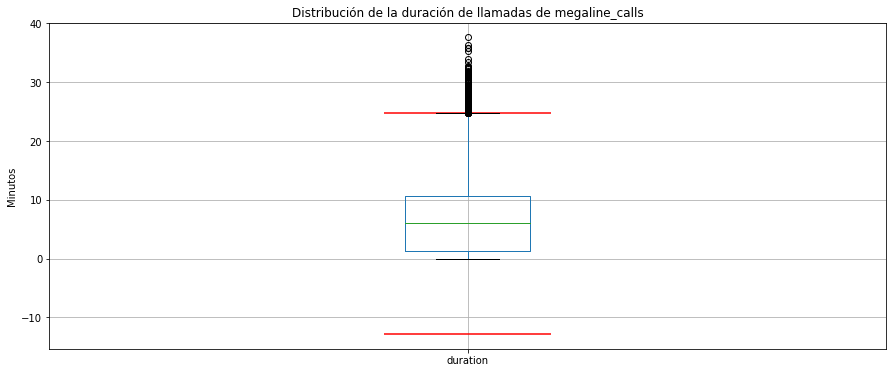

In [ ]:
Q1 = megaline_calls['duration'].quantile(0.25)
Q3 = megaline_calls['duration'].quantile(0.75)
IQR = Q3 - Q1
megaline_calls.boxplot(column='duration', figsize=(15,6))
plt.hlines(y=(Q3+1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1-1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución de la duración de llamadas de megaline_calls')
plt.ylabel('Minutos')

Como se ve en la imagen el límite inferior está muy por debajo de cero, con lo cual creo que será prudente guardar estos datos para nuestro estudio. Ahora, revisaremos nuestra columna de mb_used en megaline_internet:

In [ ]:
percentaje_of_ceros = (len(megaline_internet.query('mb_used == 0')) *100)/len(megaline_internet)
percentaje_of_ceros

13.11423801574052

Como podemos ver, el porcentaje es menor que en la columna duration, sin embargo es un monto grande. Veamos su distribución:

Text(0, 0.5, 'Megabytes')

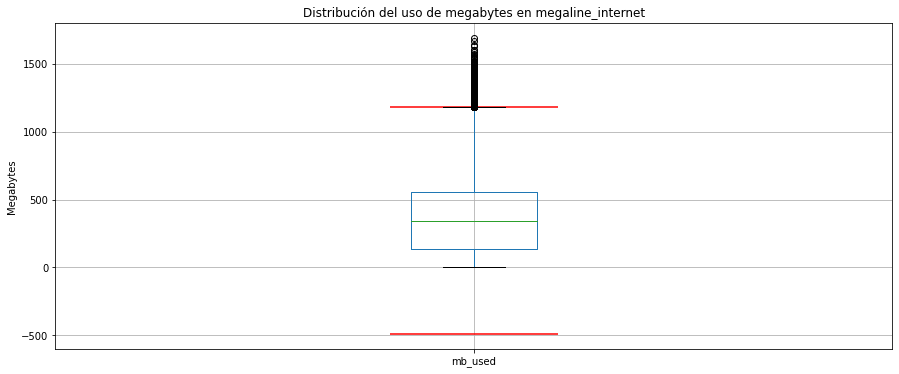

In [ ]:
Q1 = megaline_internet['mb_used'].quantile(0.25)
Q3 = megaline_internet['mb_used'].quantile(0.75)
IQR = Q3 - Q1
megaline_internet.boxplot(column='mb_used', figsize=(15,6))
plt.hlines(y=(Q3+1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q1-1.5*IQR), xmin=0.9, xmax=1.1, color='red')
plt.title('Distribución del uso de megabytes en megaline_internet')
plt.ylabel('Megabytes')

Como en el caso anterior, nuestro bigote inferior está muy por debajo del valor 0. En consecuencia guardaremos estos valores ya que nos pueden dar datos interesantes en el estudio.

**Conclusión**
Revisamos la columna 'churn_date' de megaline_users que es la que contenía más valores ausentes. Decidimos mantener la columna y pasar los valores ausentes a 0, ya que la columna nos muestra a los usuarios de baja. Es importante destacar que como las otras tablas nos presentan los montos mensuales, los usuarios dados de baja si nos sirven para nuestro estudio general.

Por otro lado, revisamos las columnas de duration y mb_used de magaline_calls y megaline_internet respectivamente, definimos que los valores en cero corresponden a valores utiles que se encuentran en los parámetros que influyen en nuestro estudio, con lo cual se mantuvieron todos.

### Preparación de las tablas <a id='preparación_tablas'></a>

En este punto vamos a preparar tres tablas (una para las llamadas, una para el internet y una para los mensajes) con todos los datos relevantes para nuestro estudio. Con estás tres tablas preparadas podremos crear una cuarta tabla que las una a todas que contendrá las siguientes columnas:
- User ID
- City
- Month
- Plan
- USD_montly_pay (megaline_plans_head)
- Llamadas totales por mes
- Ingresos totales por llamadas extras al mes
- Megas totales por mes
- Ingresos totales por megas extras al mes
- Mensajes totales por mes
- Ingresos totales por mensajes extras al mes
- Total de Ingresos totales por plan por mes

Con estas nueva tabla esperamos poder responder a nuestras hipótesis iniciales. Lo primero que haremos es cambiar el nombre de la columna 'plan_name' a 'plan' en el dataset *megaline_plans*:

In [ ]:
megaline_plans = megaline_plans.rename(columns={"plan_name": "plan"})

#### megaline_calls mejorada <a id='preparación_calls'></a>

Con esta tabla, primero vamos a redondear las duración de llamadas de acuerdo a la descripción tarifaria de Megaline:

In [ ]:
megaline_calls['duration'] = megaline_calls['duration'].apply(np.ceil)

Luego agregaremos una columna para obtener el mes de llamada:

In [ ]:
megaline_calls['month'] = megaline_calls['call_date'].astype('datetime64[M]')

In [ ]:
megaline_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12-01
1,1000_145,1000,2018-12-27,14.0,2018-12-01
2,1000_247,1000,2018-12-27,15.0,2018-12-01
3,1000_309,1000,2018-12-28,6.0,2018-12-01
4,1000_380,1000,2018-12-30,5.0,2018-12-01


Con esta tabla, ya podemos agrupar nuestros datos por usuario y por mes:

In [ ]:
calls_by_user_by_month = megaline_calls.groupby(["user_id", "month"]).agg({"id": "count", "duration": "sum"}).reset_index()
calls_by_user_by_month.columns = ['user_id', 'month', 'number_of_calls', 'monthly_duration']
calls_by_user_by_month

,user_id,month,number_of_calls,monthly_duration
0,1000,2018-12-01,16,124.0
1,1001,2018-08-01,27,182.0
2,1001,2018-09-01,49,315.0
3,1001,2018-10-01,65,393.0
4,1001,2018-11-01,64,426.0
...,...,...,...,...
2253,1498,2018-12-01,39,339.0
2254,1499,2018-09-01,41,346.0
2255,1499,2018-10-01,53,385.0
2256,1499,2018-11-01,45,308.0


Ya tenemos nuestra tabla agrupada por usuario y mes, podemos ver en ella el número de llamadas mensuales y la duración total de las mismas. Vamos a sacar de la tabla megaline users las columnas que nos pueden servir para este estudio ('user_id', 'age', 'city' y 'plan'):

In [ ]:
calls_expanded = megaline_users.loc[:,['user_id','age','city','plan']]
calls_expanded.head()

,user_id,age,city,plan
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,52,"Tulsa, OK MSA",surf
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",surf


A esta tabla le añadiremos los datos relevantes del dataset *megaline_plans* ('minutes_included' y 'usd_per_minute'):

In [ ]:
calls_plans = megaline_plans.loc[:,['plan','minutes_included','usd_per_minute']]
calls_plans

,plan,minutes_included,usd_per_minute
0,surf,500,0.03
1,ultimate,3000,0.01


Con estas tablas crearemos una nueva que una a las tres:

In [ ]:
calls_monthly = calls_expanded.merge(calls_plans, on='plan')
calls_monthly = calls_monthly.merge(calls_by_user_by_month, on='user_id')
calls_monthly.head()

,user_id,age,city,plan,minutes_included,usd_per_minute,month,number_of_calls,monthly_duration
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,0.01,2018-12-01,16,124.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,2018-11-01,2,10.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,2018-12-01,9,59.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,2018-10-01,71,476.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,2018-11-01,63,446.0


Vamos a añadir la columna 'extra_minutes' que como su nombre lo indica corresponde a los minutos que se pasaron los usuarios cada mes por plan:

In [ ]:
calls_monthly['extra_minutes'] = calls_monthly['monthly_duration'] - calls_monthly['minutes_included']
calls_monthly.query('extra_minutes < 0').head()

,user_id,age,city,plan,minutes_included,usd_per_minute,month,number_of_calls,monthly_duration,extra_minutes
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,0.01,2018-12-01,16,124.0,-2876.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,2018-11-01,2,10.0,-2990.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,2018-12-01,9,59.0,-2941.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,2018-10-01,71,476.0,-2524.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,2018-11-01,63,446.0,-2554.0


Como se puede ver hay muchos valores negativos, los vamos a pasar a cero:

In [ ]:
calls_monthly['extra_minutes'] = np.where(calls_monthly['extra_minutes'] < 0, 0, calls_monthly['extra_minutes'])

Vamos a comprobar que ya no tenemos valores negativos:

In [ ]:
calls_monthly.query('extra_minutes < 0')

,user_id,age,city,plan,minutes_included,usd_per_minute,month,number_of_calls,monthly_duration,extra_minutes


Pasaremos nuestras columnas de minutos a valores enteros:

In [ ]:
calls_monthly['monthly_duration'] = calls_monthly['monthly_duration'].astype('int')
calls_monthly['extra_minutes'] = calls_monthly['extra_minutes'].astype('int')

Ahora, podemos crear nuestra columna con el valor extra que pagó cada usuario mensualmente:

In [ ]:
calls_monthly['extracalls_revenue'] = calls_monthly['extra_minutes'] * calls_monthly['usd_per_minute']

In [ ]:
calls_monthly.head()

,user_id,age,city,plan,minutes_included,usd_per_minute,month,number_of_calls,monthly_duration,extra_minutes,extracalls_revenue
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,0.01,2018-12-01,16,124,0,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,2018-11-01,2,10,0,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,3000,0.01,2018-12-01,9,59,0,0.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,2018-10-01,71,476,0,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,3000,0.01,2018-11-01,63,446,0,0.0


Hemos logrado obtener entonces nuestra base **"calls_monthly"** que contiene las llamadas mensuales y los costos extras. Utilizaremos esta tabla de nuevo al crear nuestra tabla final.

#### megaline_internet mejorada <a id='preparación_internet'></a>

Lo primero que vamos a hacer, es regularizar todos los valores ya sea a megabytes o gigabytes. Como el precio extra está considerado por gigabyte lo mejor es homologar todo a este valor, ya que modificar el precio podría cambiar los valores. Primero crearemos una columna en megaline_plans que sea 'gb_per_month_included':

In [ ]:
megaline_plans['gb_per_month_included'] = megaline_plans['mb_per_month_included'] / 1024
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Realizaremos lo mismo con la columna 'mb_used' de *megaline_internet*, creando 'gb_used':

In [ ]:
megaline_internet['gb_used'] = megaline_internet['mb_used'] / 1024

Agregaremos nuestra columna para obtener el mes de la llamada:

In [ ]:
megaline_internet['month'] = megaline_internet['session_date'].astype('datetime64[M]')
megaline_internet.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,2018-12-01
1,1000_204,1000,2018-12-31,0.00,0.000000,2018-12-01
2,1000_379,1000,2018-12-28,660.40,0.644922,2018-12-01
3,1000_413,1000,2018-12-26,270.99,0.264639,2018-12-01
4,1000_442,1000,2018-12-27,880.22,0.859590,2018-12-01


Con esta tabla, ya podemos agrupar nuestros datos por usuario y por mes:

In [ ]:
internet_by_user_by_month = megaline_internet.groupby(["user_id", "month"]).agg({"id": "count", "gb_used": "sum"}).reset_index()
internet_by_user_by_month.columns = ['user_id', 'month', 'number_of_sessions', 'monthly_gb_used']
internet_by_user_by_month

,user_id,month,number_of_sessions,monthly_gb_used
0,1000,2018-12-01,5,1.856904
1,1001,2018-08-01,25,6.756982
2,1001,2018-09-01,53,13.002754
3,1001,2018-10-01,56,21.807119
4,1001,2018-11-01,51,18.070605
...,...,...,...,...
2272,1498,2018-12-01,65,22.595400
2273,1499,2018-09-01,45,12.680430
2274,1499,2018-10-01,61,19.035576
2275,1499,2018-11-01,49,16.419756


Ahora, de acuerdo a la descripcion tarifaria de Megaline, redondearemos los gb utilizados al mes:

In [ ]:
internet_by_user_by_month['monthly_gb_used'] = internet_by_user_by_month['monthly_gb_used'].apply(np.ceil)
internet_by_user_by_month['monthly_gb_used'] = internet_by_user_by_month['monthly_gb_used'].astype('int')

In [ ]:
internet_by_user_by_month

,user_id,month,number_of_sessions,monthly_gb_used
0,1000,2018-12-01,5,2
1,1001,2018-08-01,25,7
2,1001,2018-09-01,53,14
3,1001,2018-10-01,56,22
4,1001,2018-11-01,51,19
...,...,...,...,...
2272,1498,2018-12-01,65,23
2273,1499,2018-09-01,45,13
2274,1499,2018-10-01,61,20
2275,1499,2018-11-01,49,17


Ya tenemos nuestra tabla agrupada por usuario y mes, podemos ver en ella el número de sesiones mensuales y los gigas totales utilizados. Como en el punto anterior, vamos a crear una tabla expandida:

In [ ]:
internet_expanded = megaline_users.loc[:,['user_id','age','city','plan']]
internet_expanded.head()

,user_id,age,city,plan
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,52,"Tulsa, OK MSA",surf
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [ ]:
internet_plans = megaline_plans.loc[:,['plan','gb_per_month_included','usd_per_gb']]
internet_plans.head()

,plan,gb_per_month_included,usd_per_gb
0,surf,15.0,10
1,ultimate,30.0,7


In [ ]:
internet_monthly = internet_expanded.merge(internet_plans, on='plan')
internet_monthly = internet_monthly.merge(internet_by_user_by_month, on='user_id')
internet_monthly.head()

,user_id,age,city,plan,gb_per_month_included,usd_per_gb,month,number_of_sessions,monthly_gb_used
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,30.0,7,2018-12-01,5,2
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,2018-11-01,7,3
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,2018-12-01,63,32
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,2018-10-01,57,17
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,2018-11-01,72,24


Añadiremos la columna 'extra_gb' que correspondera al monto en gigas pasado lo incluido en el plan, también transformaremos los valores negativos en cero:

In [ ]:
internet_monthly['extra_gb'] = internet_monthly['monthly_gb_used'] - internet_monthly['gb_per_month_included']
internet_monthly['extra_gb'] = np.where(internet_monthly['extra_gb'] < 0, 0, internet_monthly['extra_gb'])

In [ ]:
internet_monthly.head()

,user_id,age,city,plan,gb_per_month_included,usd_per_gb,month,number_of_sessions,monthly_gb_used,extra_gb
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,30.0,7,2018-12-01,5,2,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,2018-11-01,7,3,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,2018-12-01,63,32,2.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,2018-10-01,57,17,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,2018-11-01,72,24,0.0


Finalmente sacaremos el monto extra a pagar por excederse en los gigabytes:

In [ ]:
internet_monthly['extragigas_revenue'] = internet_monthly['extra_gb'] * internet_monthly['usd_per_gb']
internet_monthly.head()

,user_id,age,city,plan,gb_per_month_included,usd_per_gb,month,number_of_sessions,monthly_gb_used,extra_gb,extragigas_revenue
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,30.0,7,2018-12-01,5,2,0.0,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,2018-11-01,7,3,0.0,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,30.0,7,2018-12-01,63,32,2.0,14.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,2018-10-01,57,17,0.0,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,30.0,7,2018-11-01,72,24,0.0,0.0


Con esto terminamos nuestra tabla base **"internet_monthly"**.

#### megaline_messages mejorada <a id='preparación_messages'></a>

Con nuestra tabla de mensajes, vamos a crear la columna del mes, para a posteriori realizar la agrupación por usuario y mes:

In [ ]:
megaline_messages['month'] = megaline_messages['message_date'].astype('datetime64[M]')

In [ ]:
messages_by_user_by_month = megaline_messages.groupby(["user_id", "month"]).agg({"id": "count"}).reset_index()
messages_by_user_by_month.columns = ['user_id', 'month', 'number_of_messages']
messages_by_user_by_month.head()

,user_id,month,number_of_messages
0,1000,2018-12-01,11
1,1001,2018-08-01,30
2,1001,2018-09-01,44
3,1001,2018-10-01,53
4,1001,2018-11-01,36


Ya tenemos nuestra tabla agrupada por usuario y mes, podemos ver en ella el número de mensajes mensuales. Crearemos entonces nuestra tabla de mensajes mensuales:

In [ ]:
messages_expanded = megaline_users.loc[:,['user_id','age','city','plan']]

In [ ]:
messages_plans = megaline_plans.loc[:,['plan','messages_included','usd_per_message']]

In [ ]:
messages_monthly = messages_expanded.merge(messages_plans, on='plan')
messages_monthly = messages_monthly.merge(messages_by_user_by_month, on='user_id')
messages_monthly.head()

,user_id,age,city,plan,messages_included,usd_per_message,month,number_of_messages
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,0.01,2018-12-01,11
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,0.01,2018-11-01,15
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,0.01,2018-12-01,139
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,0.01,2018-10-01,21
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,0.01,2018-11-01,37


Añadiremos la columna 'extra_messages' y luego 'extramessages_revenue':

In [ ]:
messages_monthly['extra_messages'] = messages_monthly['number_of_messages'] - messages_monthly['messages_included']
messages_monthly['extra_messages'] = np.where(messages_monthly['extra_messages'] < 0, 0, messages_monthly['extra_messages'])

In [ ]:
messages_monthly['extramessages_revenue'] = messages_monthly['extra_messages'] * messages_monthly['usd_per_message']
messages_monthly.head()

,user_id,age,city,plan,messages_included,usd_per_message,month,number_of_messages,extra_messages,extramessages_revenue
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,0.01,2018-12-01,11,0,0.0
1,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,0.01,2018-11-01,15,0,0.0
2,1006,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,0.01,2018-12-01,139,0,0.0
3,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,0.01,2018-10-01,21,0,0.0
4,1008,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,0.01,2018-11-01,37,0,0.0


Con esto, completamos nuestra tercera tabla **"messages_monthly"**. Ahora podemos juntar las tres en una tabla que nos entregue los ingresos totales por mes.

#### megaline_monthly_revenue <a id='preparación_revenue'></a>

Con las tres tablas creada ya podemos realizar un analisis interesante del la cantidad de llamadas, megas y mensajes mensuales. Con ellas comprenderemos el comportamiento de los clientes, pero nos gustaría poder analizar los planes con el fin de responder a nuestras hipótesis iniciales. Crearemos entonces una tabla que se llamará *megaline_monthly_revenue* que una a las tres.

In [ ]:
monthly_revenue_expanded = megaline_users.loc[:,['user_id','city','plan']]
monthly_revenue_plans = megaline_plans.loc[:,['plan','usd_monthly_pay']]
monthly_revenue = monthly_revenue_expanded.merge(monthly_revenue_plans, on='plan')
monthly_revenue.head()

,user_id,city,plan,usd_monthly_pay
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70
3,1011,"Cleveland-Elyria, OH MSA",ultimate,70
4,1013,"Knoxville, TN MSA",ultimate,70


A nuestra tabla inicial 'monthly_id' le añadiremos primero las llamadas:

In [ ]:
calls_revenue = calls_monthly.loc[:,['user_id','month','number_of_calls','extracalls_revenue']]
len(calls_revenue)

2258

In [ ]:
monthly_revenue_calls = monthly_revenue.merge(calls_revenue, on='user_id')
monthly_revenue_calls

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,2018-12-01,16,0.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-11-01,2,0.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-12-01,9,0.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-10-01,71,0.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-11-01,63,0.0
...,...,...,...,...,...,...,...
2253,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,2018-12-01,39,0.0
2254,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,2018-09-01,41,0.0
2255,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,2018-10-01,53,0.0
2256,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,2018-11-01,45,0.0


Ahora crearemos la misma tabla para los gigas utilizados:

In [ ]:
internet_revenue = internet_monthly.loc[:,['user_id','month','number_of_sessions','extragigas_revenue']]
len(internet_revenue)

2277

In [ ]:
monthly_revenue_internet = monthly_revenue.merge(internet_revenue, on=['user_id'])
monthly_revenue_internet

,user_id,city,plan,usd_monthly_pay,month,number_of_sessions,extragigas_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,2018-12-01,5,0.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-11-01,7,0.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-12-01,63,14.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-10-01,57,0.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-11-01,72,0.0
...,...,...,...,...,...,...,...
2272,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,2018-12-01,65,80.0
2273,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,2018-09-01,45,0.0
2274,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,2018-10-01,61,50.0
2275,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,20,2018-11-01,49,20.0


Ahora haremos lo mismo para los mensajes:

In [ ]:
messages_revenue = messages_monthly.loc[:,['user_id','month','number_of_messages','extramessages_revenue']]
len(messages_revenue)

1806

In [ ]:
monthly_revenue_messages = monthly_revenue.merge(messages_revenue, on=['user_id'])
monthly_revenue_messages

,user_id,city,plan,usd_monthly_pay,month,number_of_messages,extramessages_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,2018-12-01,11,0.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-11-01,15,0.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-12-01,139,0.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-10-01,21,0.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-11-01,37,0.0
...,...,...,...,...,...,...,...
1801,1496,"New Orleans-Metairie, LA MSA",surf,20,2018-08-01,2,0.0
1802,1496,"New Orleans-Metairie, LA MSA",surf,20,2018-09-01,21,0.0
1803,1496,"New Orleans-Metairie, LA MSA",surf,20,2018-10-01,18,0.0
1804,1496,"New Orleans-Metairie, LA MSA",surf,20,2018-11-01,13,0.0


Ahora que tenemos las tres tablas con nombres de usuarios y sus respectivos meses asociados las podemos unir en una:

In [ ]:
monthly_revenue = monthly_revenue_calls
monthly_revenue = monthly_revenue.merge(monthly_revenue_internet, on=['user_id', 'city', 'plan', 'usd_monthly_pay', 'month'], how='outer')
monthly_revenue.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_revenue,number_of_sessions,extragigas_revenue
0,1000.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,2018-12-01,16.0,0.0,5.0,0.0
1,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-11-01,2.0,0.0,7.0,0.0
2,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-12-01,9.0,0.0,63.0,14.0
3,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-10-01,71.0,0.0,57.0,0.0
4,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-11-01,63.0,0.0,72.0,0.0


In [ ]:
monthly_revenue = monthly_revenue.merge(monthly_revenue_messages, on=['user_id', 'city', 'plan', 'usd_monthly_pay', 'month'], how='outer')
monthly_revenue.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_revenue,number_of_sessions,extragigas_revenue,number_of_messages,extramessages_revenue
0,1000.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,2018-12-01,16.0,0.0,5.0,0.0,11.0,0.0
1,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-11-01,2.0,0.0,7.0,0.0,15.0,0.0
2,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-12-01,9.0,0.0,63.0,14.0,139.0,0.0
3,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-10-01,71.0,0.0,57.0,0.0,21.0,0.0
4,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-11-01,63.0,0.0,72.0,0.0,37.0,0.0


Vamos a comprobar la información en nuestra nueva tabla:

In [ ]:
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   float64       
 1   city                   2293 non-null   object        
 2   plan                   2293 non-null   object        
 3   usd_monthly_pay        2293 non-null   int64         
 4   month                  2293 non-null   datetime64[ns]
 5   number_of_calls        2258 non-null   float64       
 6   extracalls_revenue     2258 non-null   float64       
 7   number_of_sessions     2277 non-null   float64       
 8   extragigas_revenue     2277 non-null   float64       
 9   number_of_messages     1806 non-null   float64       
 10  extramessages_revenue  1806 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 215.0+ KB


Podemos notar que tenemos valores ausentes en los numeros de llamadas, sessiones y mensajes, estos se deben a los valores en cero. Vamos a rellenar estos valores de inmediato para proseguir:

In [ ]:
monthly_revenue = monthly_revenue.fillna(0)
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   float64       
 1   city                   2293 non-null   object        
 2   plan                   2293 non-null   object        
 3   usd_monthly_pay        2293 non-null   int64         
 4   month                  2293 non-null   datetime64[ns]
 5   number_of_calls        2293 non-null   float64       
 6   extracalls_revenue     2293 non-null   float64       
 7   number_of_sessions     2293 non-null   float64       
 8   extragigas_revenue     2293 non-null   float64       
 9   number_of_messages     2293 non-null   float64       
 10  extramessages_revenue  2293 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 215.0+ KB


Ahora que tenemos nuestro consolidado, será facil obtener el valor total por usuario y por mes.

In [ ]:
monthly_revenue['total_revenue'] = monthly_revenue['usd_monthly_pay'] + monthly_revenue['extracalls_revenue'] + monthly_revenue['extragigas_revenue'] + monthly_revenue['extramessages_revenue']
monthly_revenue.head()

,user_id,city,plan,usd_monthly_pay,month,number_of_calls,extracalls_revenue,number_of_sessions,extragigas_revenue,number_of_messages,extramessages_revenue,total_revenue
0,1000.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,2018-12-01,16.0,0.0,5.0,0.0,11.0,0.0,70.0
1,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-11-01,2.0,0.0,7.0,0.0,15.0,0.0,70.0
2,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70,2018-12-01,9.0,0.0,63.0,14.0,139.0,0.0,84.0
3,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-10-01,71.0,0.0,57.0,0.0,21.0,0.0,70.0
4,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70,2018-11-01,63.0,0.0,72.0,0.0,37.0,0.0,70.0


Perfecto, tenemos nuestra base de datos consolidada, pero vamos a ordenar las columnas para una visualización más amigable:

In [ ]:
monthly_revenue = monthly_revenue[['user_id','city','month','plan','number_of_calls','number_of_sessions','number_of_messages','usd_monthly_pay','extracalls_revenue','extragigas_revenue','extramessages_revenue','total_revenue']]
monthly_revenue.head()

,user_id,city,month,plan,number_of_calls,number_of_sessions,number_of_messages,usd_monthly_pay,extracalls_revenue,extragigas_revenue,extramessages_revenue,total_revenue
0,1000.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-01,ultimate,16.0,5.0,11.0,70,0.0,0.0,0.0,70.0
1,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-01,ultimate,2.0,7.0,15.0,70,0.0,0.0,0.0,70.0
2,1006.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-12-01,ultimate,9.0,63.0,139.0,70,0.0,14.0,0.0,84.0
3,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-10-01,ultimate,71.0,57.0,21.0,70,0.0,0.0,0.0,70.0
4,1008.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-11-01,ultimate,63.0,72.0,37.0,70,0.0,0.0,0.0,70.0


Con nuestras 4 bases de datos preparadas. Estamos listos para comenzar el analisis de nuestros datos.

## Analisis de las tablas <a id='analisis_tablas'></a>

En esta sección buscaremos describir el comportamiento de los clientes de Megaline. Para ello analizaremos los minutos, SMS y volumen de datos requeridos por los usuarios por plan y por mes. Haremos primero una revisión general de nuestra tabla:

In [ ]:
monthly_revenue.describe()

,user_id,number_of_calls,number_of_sessions,number_of_messages,usd_monthly_pay,extracalls_revenue,extragigas_revenue,extramessages_revenue,total_revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,60.067597,45.715220,33.166594,35.699956,1.264828,27.242041,0.144322,64.351147
std,143.051927,32.402563,19.587177,34.070085,23.210863,3.233992,48.571724,0.493515,46.624945
min,1000.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,38.000000,35.000000,3.000000,20.000000,0.000000,0.000000,0.000000,23.480000
50%,1245.000000,60.000000,48.000000,26.000000,20.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,79.000000,58.000000,51.000000,70.000000,0.000000,40.000000,0.000000,70.000000
max,1499.000000,205.000000,138.000000,266.000000,70.000000,30.300000,550.000000,6.480000,590.370000


En la revisión general, podemos notar que en promedio los usuarios de Megaline hace 60 llamadas al mes, abren 46 sessiones en internet y mandan 33 mensajes de texto. Notamos también que en promedio mensualmente gasta 65 dolares (bastante más que el promedio mensual sin los cobros extras 36 dolares). Otro punto interesante es que en promedio, en llamadas extra los usuarios gastan 1.3 dolares, mientras que en gigas extras 28 dolares y en mensajes 0.14 dolares.

In [ ]:
minutes_per_month = monthly_revenue.groupby('month').agg({'number_of_calls': 'mean'}).reset_index()
gigas_per_month = monthly_revenue.groupby('month').agg({'number_of_sessions': 'mean'}).reset_index()
messages_per_month = monthly_revenue.groupby('month').agg({'number_of_messages': 'mean'}).reset_index()

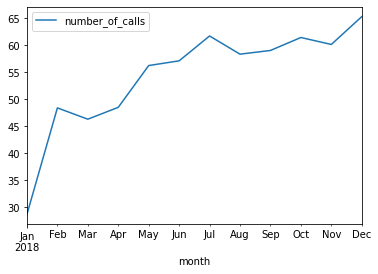

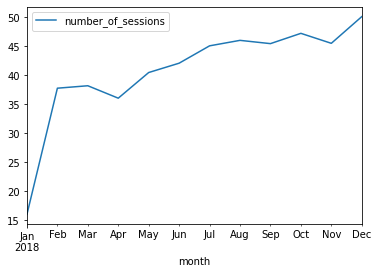

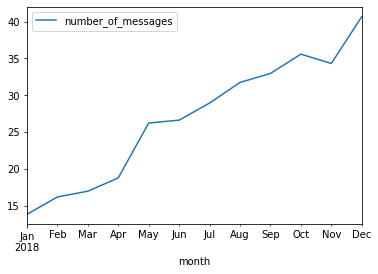

In [ ]:
minutes_per_month.plot(kind="line", x="month", y="number_of_calls")
gigas_per_month.plot(kind="line", x="month", y="number_of_sessions")
messages_per_month.plot(kind="line", x="month", y="number_of_messages")
plt.show()

Viendo los gráficos, podemos notar que en términos generales, para las llamadas notamos un salto de enero a febrero, y luego las llamadas siguen subiendo llegando a un máximo de 65 llamadas en diciembre. Con las sesiones de internet, vemos un comportamiento similar, pero con una leve caída en abril y luego vuelven a subir pero de manera más progresiva que las llamadas. 
Con los mensajes de textos estos aumentan casi de manera constante, con un salto en mayo y una leve caída en noviembre. Importante a tener en cuenta, sería interesante ver los números del siguiente año para ver si efectivamente hay una caída en los números en enero.

### Analisis de minutos por plan <a id='analisis_minutos'></a>

In [ ]:
print('La media de llamadas para el plan surf es de:', monthly_revenue.query('plan == "surf"')['number_of_calls'].mean())
print('La desviación estándar de llamadas para el plan surf es de:', monthly_revenue.query('plan == "surf"')['number_of_calls'].std())
print()
print('La media de llamadas para el plan ultimate es de:', monthly_revenue.query('plan == "ultimate"')['number_of_calls'].mean())
print('La desviación estándar de llamadas para el plan ultimate es de:', monthly_revenue.query('plan == "ultimate"')['number_of_calls'].std())

La media de llamadas para el plan surf es de: 59.811824539097266
La desviación estándar de llamadas para el plan surf es de: 32.0179885434927

La media de llamadas para el plan ultimate es de: 60.62638888888889
La desviación estándar de llamadas para el plan ultimate es de: 33.24299415063124


Como se puede apreciar la media de llamadas y la desviación estándar de ambos planes no varian mucho. La media de llamadas es de 60 para el plan Surf y 61 para el Ultimate, y la desviación estándar es de 32 para el plan Surf y 33 para el plan Ultimate. Veamos si la distribución también es similar:

<function matplotlib.pyplot.show(close=None, block=None)>

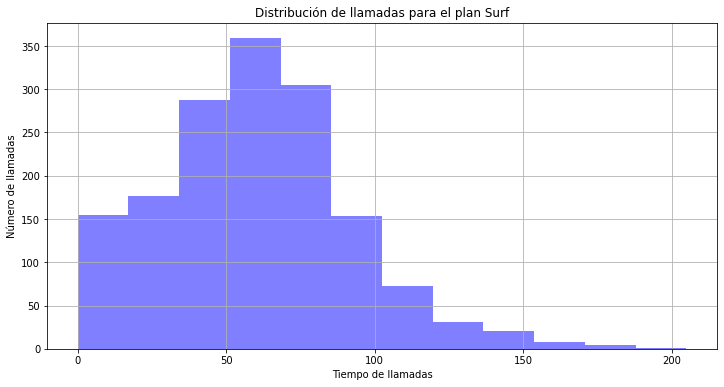

In [ ]:
monthly_revenue.query('plan == "surf"').hist('number_of_calls', bins=12, color='blue', alpha=0.5, figsize=(12, 6))
plt.xlabel('Tiempo de llamadas')
plt.ylabel('Número de llamadas')
plt.title('Distribución de llamadas para el plan Surf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

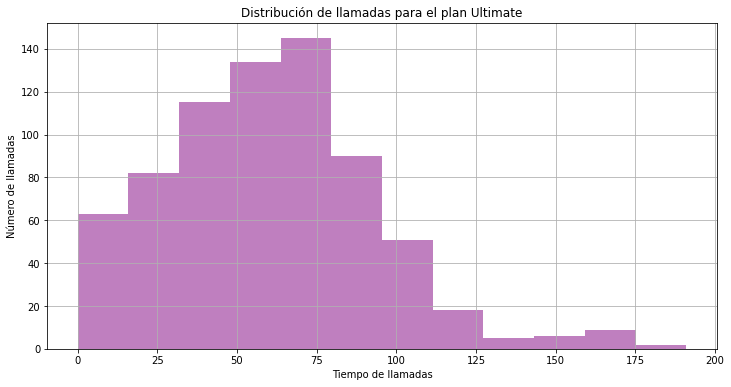

In [ ]:
monthly_revenue.query('plan == "ultimate"').hist('number_of_calls', bins=12, color='purple', alpha=0.5, figsize=(12, 6))
plt.xlabel('Tiempo de llamadas')
plt.ylabel('Número de llamadas')
plt.title('Distribución de llamadas para el plan Ultimate')
plt.show

Podemos apreciar que en el plan Surf, la mayoría de las llamadas se concentran en el rango de 30 a 80 minutos, a partir de los 80 minutos comienza a bajar, luego más baja drásticamente a partir de los 120 podemos ver menos de 50 llamadas. La mayor conglomeración de llamadas (350) se encuentra entre los 50 y 60 minutos. En cambio, en el método Ultimate, los números de llamadas no pasan las 150, pero el rango es más amplio, entre 30 y 80 superan las 100 llamadas. La bajada también es menos drástica en este plan, a la altura de los 110 ya comienzan a ser menos de 20 llamadas. 

### Analisis de gigas utilizados <a id='analisis_sesiones'></a>

In [ ]:
print('La media de gigas utilizados para el plan surf es de:', internet_monthly.query('plan == "surf"')['monthly_gb_used'].mean())
print('La desviación estándar para el plan surf es de:', internet_monthly.query('plan == "surf"')['monthly_gb_used'].std())
print()
print('La media de gigas utilizados para el plan ultimate es de:', internet_monthly.query('plan == "ultimate"')['monthly_gb_used'].mean())
print('La desviación estándar para el plan ultimate es de:', internet_monthly.query('plan == "ultimate"')['monthly_gb_used'].std())

La media de gigas utilizados para el plan surf es de: 16.831193838254173
La desviación estándar para el plan surf es de: 7.711921556321404

La media de gigas utilizados para el plan ultimate es de: 17.331015299026426
La desviación estándar para el plan ultimate es de: 7.648184953980576


Nuevamente los números son bastante similares si los redondeamos (sin comas) tanto surf como ultimate tienen 17 gigas utilizados de media, la desviación estándar es del orden de los 8 para los dos planes.

<function matplotlib.pyplot.show(close=None, block=None)>

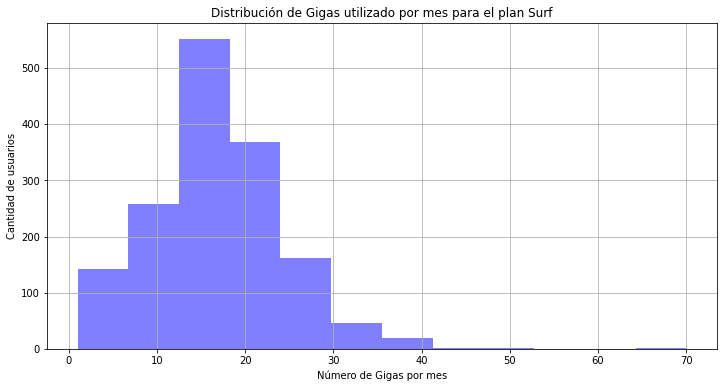

In [ ]:
internet_monthly.query('plan == "surf"').hist('monthly_gb_used', bins=12, color='blue', alpha=0.5, figsize=(12, 6))
plt.xlabel('Número de Gigas por mes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de Gigas utilizado por mes para el plan Surf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

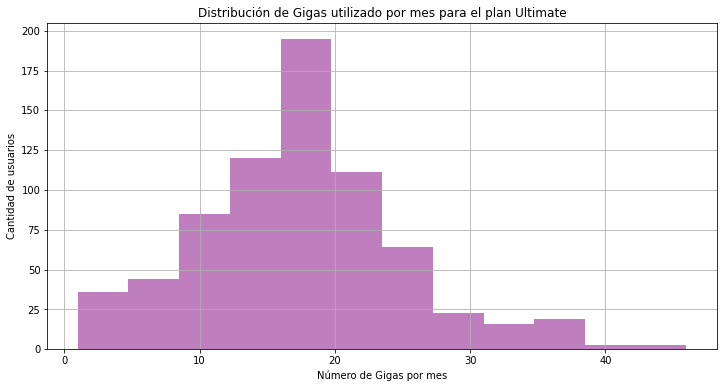

In [ ]:
internet_monthly.query('plan == "ultimate"').hist('monthly_gb_used', bins=12, color='purple', alpha=0.5, figsize=(12, 6))
plt.xlabel('Número de Gigas por mes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de Gigas utilizado por mes para el plan Ultimate')
plt.show

En términos de gigas utilizados, podemos ver que en el plan Surf tiene un sesgo a la izquierda, la mayoría de los usuarios utilizan del orden de 15 gigas. Son pocos los usuarios que utilizan más de 20, y muchos menos de 100 los que utilizan más de 30 gigas. La distribución del plan Ultimate es más centrada, el pico también se encuentra entre los 15 y 20 gigas.

### Analisis de mensajes por plan <a id='analisis_mensajes'></a>

In [ ]:
print('La media de mensajes para el plan surf es de:', monthly_revenue.query('plan == "surf"')['number_of_messages'].mean())
print('La desviación estándar de mensajes para el plan surf es de:', monthly_revenue.query('plan == "surf"')['number_of_messages'].std())
print()
print('La media de mensajes para el plan ultimate es de:', monthly_revenue.query('plan == "ultimate"')['number_of_messages'].mean())
print('La desviación estándar de mensajes para el plan ultimate es de:', monthly_revenue.query('plan == "ultimate"')['number_of_messages'].std())

La media de mensajes para el plan surf es de: 31.15956770502225
La desviación estándar de mensajes para el plan surf es de: 33.566717473569064

La media de mensajes para el plan ultimate es de: 37.55138888888889
La desviación estándar de mensajes para el plan ultimate es de: 34.76717911404574


En el caso de los mensajes la media de mensajes para el plan Surf es de 31 mientrás que para el plan Ultimate es de 37. Con respecto a la desviación estándar el plan Surf tiene una de 34 y el plan Ultimate de 35. Veamos como se distribuyen:

<function matplotlib.pyplot.show(close=None, block=None)>

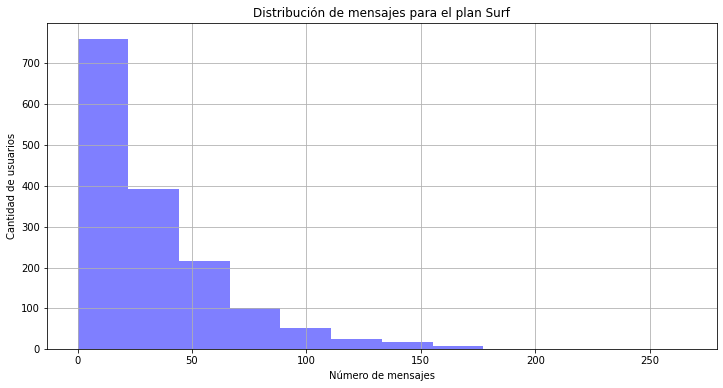

In [ ]:
monthly_revenue.query('plan == "surf"').hist('number_of_messages', bins=12, color='blue', alpha=0.5, figsize=(12, 6))
plt.xlabel('Número de mensajes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes para el plan Surf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

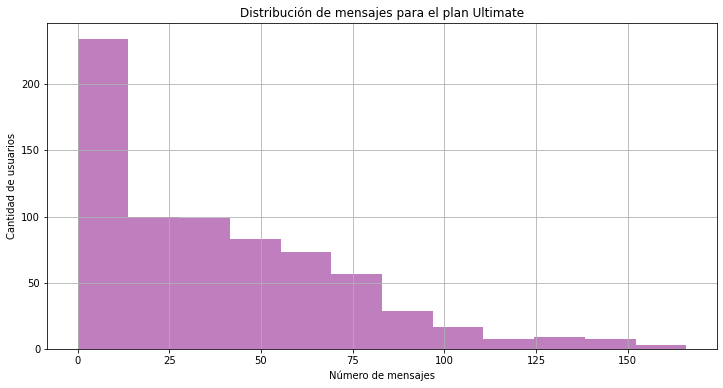

In [ ]:
monthly_revenue.query('plan == "ultimate"').hist('number_of_messages', bins=12, color='purple', alpha=0.5, figsize=(12, 6))
plt.xlabel('Número de mensajes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes para el plan Ultimate')
plt.show

Con respecto a los mensajes lo primero que notamos es que ambos histogramas están sesgados a la izquierda. En el caso del plan Surf la mayoría se encuentra en el rango de 0 a 46 mensajes llegando a más de 400 usuarios, ya en 50 la caída en número de usuarios es grande. El plan Ultimate en cambio, su rango es mucho menor entre 0 y 12 encontramos mensajes para la mayoría de los usuarios, a partir de los 40 mensajes el número de usuarios comienza a bajar considerablemente. 

### Comportamiento de los usuarios por plan <a id='comportamiento_usuario'></a>

En general la media no varia mucho para los planes Surf y Ultimate en terminos de llamadas y sessiones de internet. No así en los mensajes de texto dónde pudimos apreciar una media bastante más alta en el plan ultimate 37 mensajes versus los 31 del plan Surf. En términos de la desviación estándar pudimos notar que en general están bastante alta en los tres casos rondando las 30 llamadas y mensajes para ambos planes y en terminos de sessiones 20 para el plan surf y 18 para el plan ultimate. Si bien la media y desviación estándar es similar en ambos planes notamos mayores diferencias en el comportamiento de los usuarios de cada plan en cuanto a la distribución observada en los histogramas de llamadas, sesiones y mensajes. 
- La distribución de llamadas en ambos planes es bastante centrica, sin embargo en el plan Surf es más pronunciada llegando a un máximo de 350 llamadas en el rango de los 50 a 60. En cambio, en el plan ultimate nuestro histograma es más chato con un pick de 150 llamadas y manteniendo numeros por sobre las 80 llamadas en los rangos de 30 a 80. 
- La distribución de las sesiones de internet en cambio tienen un ligero sesgo a la derecha, en el plan Surf la mayoría de sesiones se concentran entre 35 y 70, llegando a su punto máximo 420 sesiones a la altura del 50 a 55. En cambio para el plan Ultimate, está más centrado, con su mayoría de sesiones entre los 38 a 65, nuevamente el pick es más bajo llegando a 150 sesiones. El plan ultimate se ve más centrado, con su mayoría de sesiones entre los 38 a 65, nuevamente el pick es más bajo llegando a 175 sesiones.
- Con respecto a los mensajes lo primero que notamos es que ambos histogramas están sesgados a la izquierda. En el caso del plan Surf la mayoría se encuentra en el rango de 0 a 46 mensajes llegando a más de 400 usuarios, ya en 50 la caída en número de usuarios es grande. El plan Ultimate en cambio, su rango es mucho menor entre 0 y 12 encontramos mensajes para la mayoría de los usuarios, a partir de los 40 mensajes el número de usuarios comienza a bajar considerablemente.

## Comprobación de hipótesis <a id='comprobación_hipotesis'></a>

A continuación nos concentraremos en estudiar nuestras dos hipótesis iniciales:
- **El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.**

Para ello generaremos las dos sentencias siguientes para el ingreso total de cada plan:

H0: las medias (de Surf y Ultimate) son iguales

Ha: las medias no son iguales

- **El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.**

Realizaremos lo mismo para el caso de los estados de la siguiente manera:

H0: las medias de New York y New Jersey son iguales a la media de los otros estados

Ha: las medias no son iguales



Para ello, utilizaremos un umbral de significancia del 5%, que es un umbral común para este tipo de casos.

In [ ]:
significance = 0.05

### Hipótesis I <a id='comprobación_hipotesis_1'></a>

In [ ]:
stat, p_value = ttest_ind(
    monthly_revenue.loc[monthly_revenue["plan"] == 'surf', "total_revenue"],
    monthly_revenue.loc[monthly_revenue["plan"] == 'ultimate', "total_revenue"]
)
print(f"""
    El ingreso promedio del plan surf es: {monthly_revenue.loc[monthly_revenue["plan"] == 'surf', "total_revenue"].mean()}
    La media del número de llamadas del plan ultimate es: {monthly_revenue.loc[monthly_revenue["plan"] == 'ultimate', "total_revenue"].mean()}

    t-statistic: {stat}
    p-value: {p_value}
""")

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    El ingreso promedio del plan surf es: 60.706408137317226
    La media del número de llamadas del plan ultimate es: 72.31388888888888

    t-statistic: -5.568949166552807
    p-value: 2.862674510698644e-08

Rechazamos nuestra hipótesis nula


### Hipótesis II <a id='comprobación_hipotesis_2'></a>

In [ ]:
stat, p_value = ttest_ind(
    monthly_revenue.loc[monthly_revenue["city"] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', "total_revenue"],
    monthly_revenue.loc[monthly_revenue["city"] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', "total_revenue"]
)
print(f"""
    El ingreso promedio del área de NY-NJ es: {monthly_revenue.loc[monthly_revenue["city"] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', "total_revenue"].mean()}
    El ingreso promedio de los otros estados es: {monthly_revenue.loc[monthly_revenue["city"] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', "total_revenue"].mean()}

    t-statistic: {stat}
    p-value: {p_value}
""")

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    El ingreso promedio del área de NY-NJ es: 59.92135278514589
    El ingreso promedio de los otros estados es: 65.2227713987474

    t-statistic: -2.0194429818968076
    p-value: 0.04355743162134274

Rechazamos nuestra hipótesis nula


## Conclusión general:<a id='conclusion'></a>

Al revisar nuestros 5 datasets notamos que megaline_calls, megaline_internet, megaline_messages y megaline_users tenian en común la columna user_id (que pasamos en todas las bases del tipo int64 a object), además estas cinco bases tienen fechas que pasamos del tipo object a DateTime. Notamos también que megaline_users tiene la columna plan que coincide con plan_name en megaline_plans. Entonces, para que las tablas sean congruentes, cambiamos el nombre de la columna 'plan_name' a solo 'plan'.

Por precausión, revisamos si habian duplicados en las columnas id de megaline_calls, megaline_internet y megaline_messages, y también revisamos duplicados en la columna user_id de megaline_users.

Algunos puntos que tuvimos en consideración con ciertas columnas fueron en base a los reglamentos tarifarios de Megaline: "Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes."

Revisamos en el dataset megaline_calls, columna duration los datos en minutos (8.52) redondeando los resultados hacia arriba (9 en el ejemplo). En el dataset, megaline_internet columna mb_used, la tabla nos presenta los megabytes usados en la sessión. En este caso, agrupamos las sesiones del mes y el resultado fue redondeado hacia arriba. Finalmente, teniamos que revisar las columnas de duration y mb_used (arriba mencionada) para analizar los valores en 0, lo mismo con la columna churn_data (de megaline_users) para ver la repercusión de los valores ausentes (si es que la habia).

Se regularizaron las columnas de 'user_id' y las columnas de fechas de los datasets megaline_calls, megaline_internet, megaline_messages y megaline_users. Las dejamos del tipo object y datetime64 respectivamente.

En ninguna de las columnas relevantes encontramos códigos duplicados, efectivamente tenemos solo identificadores unicos.

Revisamos la columna 'churn_date' de megaline_users que es la que contenía más valores ausentes. Decidimos mantener la columna y pasar los valores ausentes a 0, ya que la columna nos muestra a los usuarios de baja. Es importante destacar que como las otras tablas nos presentan los montos mensuales, los usuarios dados de baja si nos sirven para nuestro estudio general.

Por otro lado, revisamos las columnas de duration y mb_used de magaline_calls y megaline_internet respectivamente, definimos que los valores en cero corresponden a valores utiles que se encuentran en los parámetros que influyen en nuestro estudio, con lo cual se mantuvieron todos.

Decidimos preparar las tablas de llamadas, sessiones de internet y mensajes por separado. Para todas transformamos la fecha al primero del mes con el fin de poder filtrar más adelante los valores mensuales. En el caso de la tabla de llamadas, de acuerdo a la descripción tarifaria de Megaline redondeamos los minutos de llamada hacia arriba. Hicimos algo similar con la tabla de sesiones de internet reondeando los valores mensuales. 

Unimos las tres tablas creando la tabla **'megaline_monthly_revenue'** que consta de las siguientes columnas: 'user_id', 'city', 'month', 'plan', 'number_of_calls', 'number_of_sessions', 'number_of_messages', 'usd_monthly_pay', 'extracalls_revenue', 'extragigas_revenue', 'extramessages_revenue', 'total_revenue'.

**Con respecto al comportamiento de los usuarios:**

En la revisión general, podemos notar que en promedio los usuarios de Megaline hace 60 llamadas al mes, abren 46 sessiones en internet y mandan 33 mensajes de texto. Notamos también que en promedio mensualmente gasta 65 dolares (bastante más que el promedio mensual sin los cobros extras 36 dolares). Otro punto interesante es que en promedio, en llamadas extra los usuarios gastan 1.3 dolares, mientras que en gigas extras 28 dolares y en mensajes 0.14 dolares.

Viendo los gráficos, podemos notar que en términos generales, para las llamadas notamos un salto de enero a febrero, y luego las llamadas siguen subiendo llegando a un máximo de 65 llamadas en diciembre. Con las sesiones de internet, vemos un comportamiento similar, pero con una leve caída en abril y luego vuelven a subir pero de manera más progresiva que las llamadas. Con los mensajes de textos estos aumentan casi de manera constante, con un salto en mayo y una leve caída en noviembre. Importante a tener en cuenta, sería interesante ver los números del siguiente año para ver si efectivamente hay una caída en los números en enero.

**Con respecto a los planes Surf y Ultimate:**

En general la media no varia mucho para los planes Surf y Ultimate en terminos de llamadas y sessiones de internet. No así en los mensajes de texto dónde pudimos apreciar una media bastante más alta en el plan ultimate 37 mensajes versus los 31 del plan Surf. En términos de la desviación estándar pudimos notar que en general están bastante alta en los tres casos rondando las 30 llamadas y mensajes para ambos planes y en terminos de sessiones 20 para el plan surf y 18 para el plan ultimate. Si bien la media y desviación estándar es similar en ambos planes notamos mayores diferencias en el comportamiento de los usuarios de cada plan en cuanto a la distribución observada en los histogramas de llamadas, sesiones y mensajes. 
- La distribución de llamadas en ambos planes es bastante centrica, sin embargo en el plan Surf es más pronunciada llegando a un máximo de 350 llamadas en el rango de los 50 a 60. En cambio, en el plan ultimate nuestro histograma es más chato con un pick de 150 llamadas y manteniendo numeros por sobre las 80 llamadas en los rangos de 30 a 80. 
- En términos de gigas utilizados, podemos ver que en el plan Surf tiene un sesgo a la izquierda, la mayoría de los usuarios utilizan del orden de 15 gigas. Son pocos los usuarios que utilizan más de 20, y muchos menos de 100 los que utilizan más de 30 gigas. La distribución del plan Ultimate es más centrada, el pico también se encuentra entre los 15 y 20 gigas.
- Con respecto a los mensajes lo primero que notamos es que ambos histogramas están sesgados a la izquierda. En el caso del plan Surf la mayoría se encuentra en el rango de 0 a 46 mensajes llegando a más de 400 usuarios, ya en 50 la caída en número de usuarios es grande. El plan Ultimate en cambio, su rango es mucho menor entre 0 y 12 encontramos mensajes para la mayoría de los usuarios, a partir de los 40 mensajes el número de usuarios comienza a bajar considerablemente.

**Con respecto a nuestras hipótesis iniciales:**

Finalmente, con respecto a nuestras hipótesis iniciales. Nuestra primera pregunta era si el ingreso promedio del plan Surf difiere del ingreso promedio ultimate. De acuerdo a nuestro estudio, rechazamos la hipotesis de que el ingreso promedio del plan Surf era igual que el de Ultimate. El ingreso promedio del plan Surf es de 61 dolares mientras que el de Ultimate es de 72 dolares. 


Nuestra segunda hipótesis, indicaba que el ingreso promedio de los usuarios del área de Nueva York-Nueva Jersey es diferente al de usuarios de las otras regiones. De acuerdo a nuestro estudio, no podemos rechazar la hipotésis de que el ingreso promedio de Nueva York-New Jersey sea igual al de los otros estados. El promedio de Nueva York-New Jersey es de 60 dolares, mientras que el de los otros estados es de 65 dolares.  